# House Price Prediction - Beginner Friendly

A simple machine learning project to predict house prices using California Housing dataset.

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Step 2: Load the Dataset

In [2]:
# Load California Housing dataset (built-in, no download needed)
housing = fetch_california_housing(as_frame=True)
data = housing.frame

print(f"Dataset size: {data.shape[0]} houses, {data.shape[1]} columns")
print(f"\nFirst 5 rows:")
data.head()

Dataset size: 20640 houses, 9 columns

First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Step 3: Explore the Data

In [3]:
# Show basic statistics
print("Dataset Information:")
data.info()

print("\nBasic Statistics:")
data.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Basic Statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


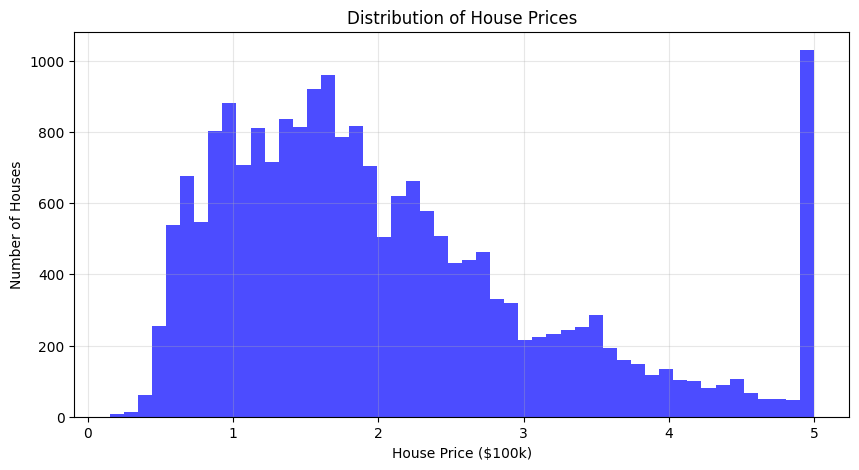

In [4]:
# Visualize house prices
plt.figure(figsize=(10, 5))
plt.hist(data['MedHouseVal'], bins=50, color='blue', alpha=0.7)
plt.xlabel('House Price ($100k)')
plt.ylabel('Number of Houses')
plt.title('Distribution of House Prices')
plt.grid(True, alpha=0.3)
plt.show()

## Step 4: Prepare the Data

In [5]:
# Separate features (X) and target (y)
X = data.drop('MedHouseVal', axis=1)  # Features
y = data['MedHouseVal']                # Target (price)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} houses")
print(f"Testing set: {X_test.shape[0]} houses")

Training set: 16512 houses
Testing set: 4128 houses


## Step 5: Train Models

In [6]:
# Model 1: Linear Regression (Simple)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("✓ Linear Regression model trained")

✓ Linear Regression model trained


In [7]:
# Model 2: Random Forest (More Advanced)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("✓ Random Forest model trained")

✓ Random Forest model trained


## Step 6: Make Predictions

In [8]:
# Make predictions on test set
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

print("Predictions made successfully!")

Predictions made successfully!


## Step 7: Evaluate Models

In [9]:
# Calculate accuracy metrics
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Model Performance:\n")
print(f"Linear Regression:")
print(f"  - Average Error: ${lr_mae:.2f} (in $100k)")
print(f"  - Accuracy Score (R²): {lr_r2:.2f}")
print()
print(f"Random Forest:")
print(f"  - Average Error: ${rf_mae:.2f} (in $100k)")
print(f"  - Accuracy Score (R²): {rf_r2:.2f}")
print()
print(f"🏆 Best Model: {'Random Forest' if rf_mae < lr_mae else 'Linear Regression'}")

Model Performance:

Linear Regression:
  - Average Error: $0.53 (in $100k)
  - Accuracy Score (R²): 0.58

Random Forest:
  - Average Error: $0.33 (in $100k)
  - Accuracy Score (R²): 0.81

🏆 Best Model: Random Forest


## Step 8: Visualize Results

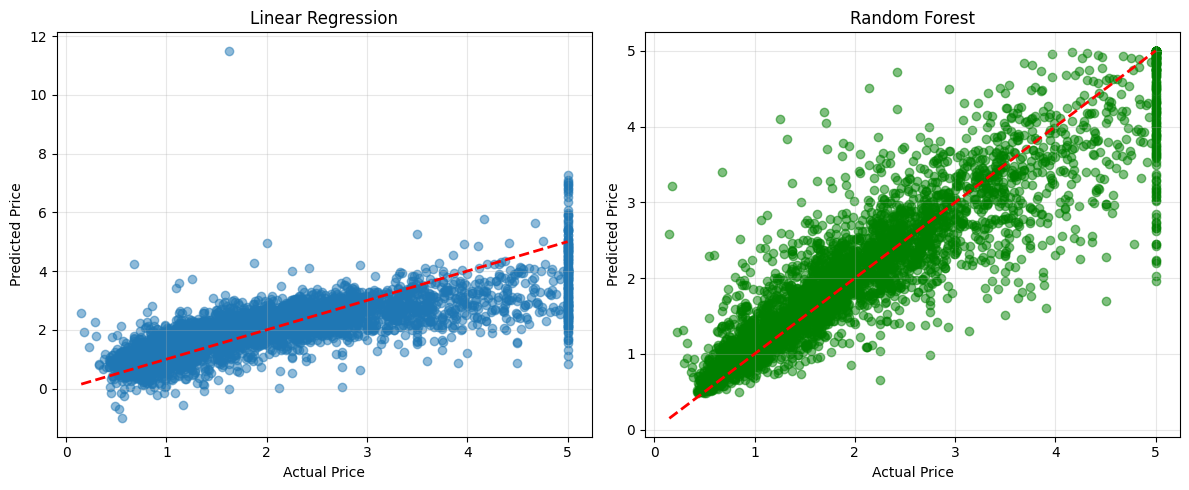

In [10]:
# Compare actual vs predicted prices
plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression')
plt.grid(True, alpha=0.3)

# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_predictions, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 9: Test with a Single House

In [11]:
# Take one house from test set
sample_house = X_test.iloc[0:1]
actual_price = y_test.iloc[0]

# Predict its price
lr_pred = lr_model.predict(sample_house)[0]
rf_pred = rf_model.predict(sample_house)[0]

print("Sample House Features:")
print(sample_house.T)
print()
print(f"Actual Price: ${actual_price:.2f} (in $100k)")
print(f"Linear Regression Prediction: ${lr_pred:.2f} (in $100k)")
print(f"Random Forest Prediction: ${rf_pred:.2f} (in $100k)")

Sample House Features:
                  20046
MedInc         1.681200
HouseAge      25.000000
AveRooms       4.192201
AveBedrms      1.022284
Population  1392.000000
AveOccup       3.877437
Latitude      36.060000
Longitude   -119.010000

Actual Price: $0.48 (in $100k)
Linear Regression Prediction: $0.72 (in $100k)
Random Forest Prediction: $0.51 (in $100k)


## Summary

**What we did:**
1. Loaded a built-in dataset (California Housing)
2. Explored the data
3. Split data into training and testing sets
4. Trained two models: Linear Regression and Random Forest
5. Made predictions and evaluated accuracy
6. Visualized the results

**Key Metrics:**
- **MAE (Mean Absolute Error)**: Average prediction error (lower is better)
- **R² Score**: How well the model fits the data (closer to 1.0 is better)

**Note:** Prices are in units of $100,000 (e.g., 2.5 = $250,000)